In [1]:
from google.colab import files
uploaded = files.upload()

Saving spotify_songs.csv to spotify_songs.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify_songs.csv")

# Show basic info and first few rows
print(df.shape)
df.head()

(500, 9)


,track_name,artist,genre,danceability,energy,acousticness,instrumentalness,valence,tempo
0,Track_362,Artist_19,Rock,0.69,0.54,0.04,0.46,0.32,105.05
1,Track_74,Artist_32,Jazz,0.52,0.95,0.04,0.44,0.82,156.01
2,Track_375,Artist_1,Electronic,0.09,0.85,0.28,0.60,0.50,166.15
3,Track_156,Artist_5,Classical,0.96,0.91,0.28,0.59,0.07,75.03
4,Track_105,Artist_45,Hip-Hop,0.76,0.81,0.79,0.81,0.31,84.07


In [3]:
# Select numerical features for clustering
features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']
X = df[features]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [6]:
# See a few clustered songs
df[['track_name', 'artist', 'genre', 'cluster']].head(10)

,track_name,artist,genre,cluster
0,Track_362,Artist_19,Rock,2
1,Track_74,Artist_32,Jazz,1
2,Track_375,Artist_1,Electronic,1
3,Track_156,Artist_5,Classical,2
4,Track_105,Artist_45,Hip-Hop,2
5,Track_395,Artist_4,Electronic,3
6,Track_378,Artist_16,Electronic,3
7,Track_125,Artist_24,Rock,1
8,Track_69,Artist_16,Electronic,1
9,Track_451,Artist_2,Classical,2


In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to dataframe
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

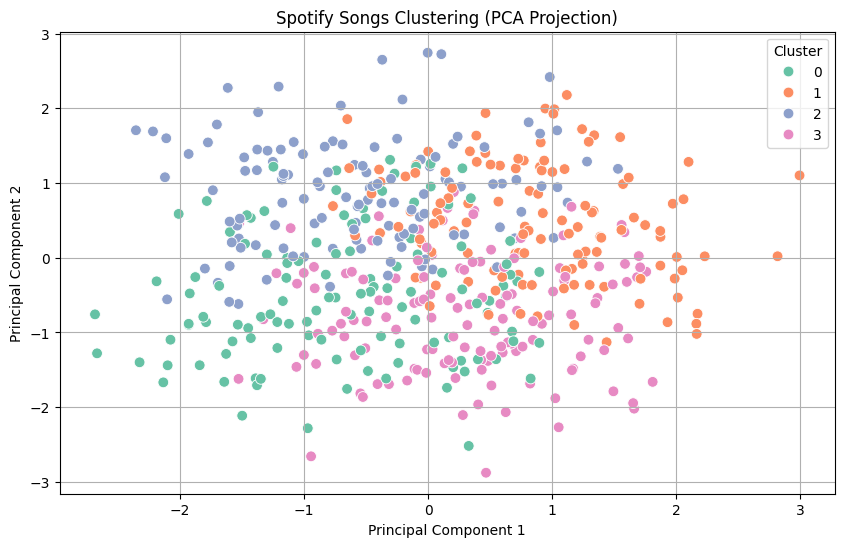

In [8]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set2', s=60)
plt.title('Spotify Songs Clustering (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [10]:
# Save the dataframe with clusters to CSV
df.to_csv("clustered_spotify_songs.csv", index=False)

In [11]:
from google.colab import files
files.download("clustered_spotify_songs.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

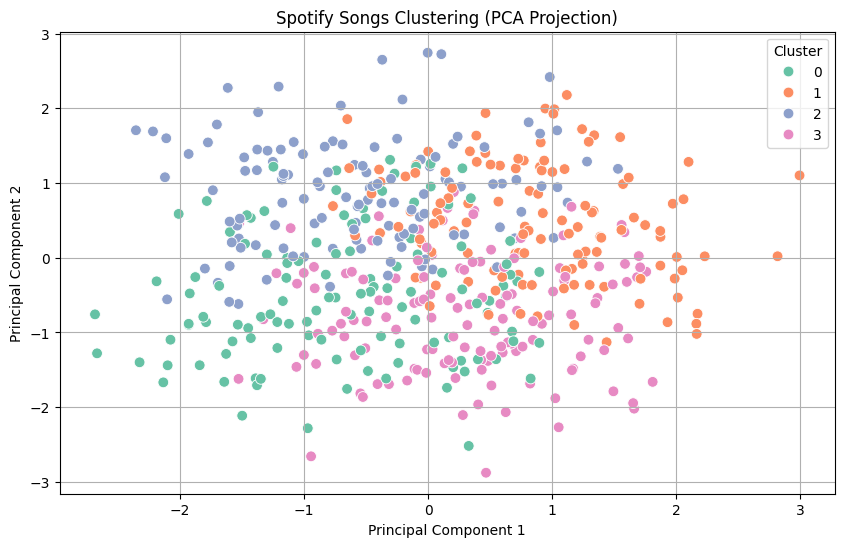

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set2', s=60)
plt.title('Spotify Songs Clustering (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig("cluster_plot.png")
files.download("cluster_plot.png")